In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
train_data = pd.read_csv('train.csv',encoding='latin-1')
test_data = pd.read_csv('test.csv', encoding='latin-1')

train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [5]:
train_data = train_data[['text', 'sentiment']]



test_data = test_data[['text','sentiment']]


desired_labels = ['positive', 'negative', 'neutral']
train_data = train_data[train_data['sentiment'].isin(desired_labels)]
test_data = test_data[test_data['sentiment'].isin(desired_labels)]

test_data

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


In [6]:
sentiment_map = {'neutral': 0, 'positive': 1, 'negative': 2}

train_data['sentiment'] = train_data['sentiment'].map(sentiment_map)
test_data['sentiment'] = test_data['sentiment'].map(sentiment_map)


test_data.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,0
1,Shanghai is also really exciting (precisely -...,1
2,"Recession hit Veronique Branquinho, she has to...",2
3,happy bday!,1
4,http://twitpic.com/4w75p - I like it!!,1


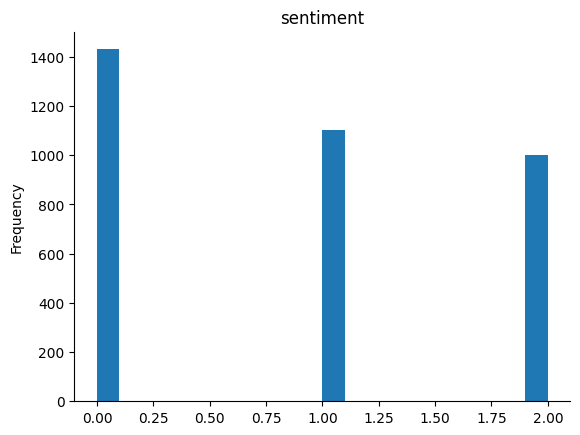

In [7]:
# @title sentiment

from matplotlib import pyplot as plt
test_data['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
x_train = np.array(train_data['text'].tolist())
y_train = np.array(train_data['sentiment'].tolist())

x_test = np.array(test_data['text'].tolist())
y_test = np.array(test_data['sentiment'].tolist())
print(y_train)

[0 2 2 ... 1 1 0]


In [9]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [10]:
x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

num_classes = len(np.unique(y_test))
print(np.unique(y_test))
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)



[0 1 2]


In [12]:
vocab_size = 20000

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=5))
model.add(LSTM(32))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.4183 - loss: 1.0669 - val_accuracy: 0.6520 - val_loss: 0.7681
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6981 - loss: 0.7143 - val_accuracy: 0.6887 - val_loss: 0.7215
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.7776 - loss: 0.5788 - val_accuracy: 0.7080 - val_loss: 0.7048
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8116 - loss: 0.5140 - val_accuracy: 0.7037 - val_loss: 0.7448
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.8434 - loss: 0.4530 - val_accuracy: 0.6882 - val_loss: 0.8193
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8590 - loss: 0.4139 - val_accuracy: 0.6935 - val_loss: 0.8025
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8759 - loss: 0.3771 - val_accuracy: 0.6904 - val_loss: 0.8562
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8915 - loss: 0.3439 - 

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)



111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[0 1 2 ... 2 1 1]


In [21]:

import numpy as np
text = [" Sooo SAD I will miss you here in San Diego!!!"]
text = np.array(text)
text = tokenizer.texts_to_sequences(text)
text = pad_sequences(text, padding='post', maxlen=40)
pred = model.predict(text)
print(pred)

if(np.argmax(pred) == 0):
  print('neutral')
elif(np.argmax(pred) == 1):
  print('positive')
else:
  print('negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.03784563 0.00683866 0.9553157 ]]
negative
